# Second approach (initial internal rotations). Three qubits case

## Define functions

In [1]:
import qiskit as qk
import numpy as np
import math as mth
import pandas as pd
import qiskit.tools.jupyter
import matplotlib.pyplot as plt
import seaborn as sns

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

"""Function second level"""

def quantum_circuit_three_qubits_configuration(z_a1, z_ba11, z_ba10, z_cb11, z_cb10,
                                              q0_level0_first_circuit_is_0,
                                              q0_level0_second_circuit_is_0,
                                              q0_level0_third_circuit_is_0):
    qreg_q = QuantumRegister(3, 'q')
    creg_c = ClassicalRegister(3, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

# z_a1 = P(A=|1>)
# z_ba11 = P(B=|1> | A=|1>)
# z_ba10 = P(B=|1> | A=|0>)
# z_cb11 = P(C=|1> | B=|1>)
# z_cb10 = P(C=|1> | B=|0>)

    circuit.reset(qreg_q[0])
    circuit.reset(qreg_q[1])
    circuit.reset(qreg_q[2])
    
    theta_z_a1=2*mth.atan(np.sqrt(z_a1/(1-z_a1)))
    theta_z_ba11=2*mth.atan(np.sqrt(z_ba11/(1-z_ba11)))
    theta_z_ba10=2*mth.atan(np.sqrt(z_ba10/(1-z_ba10)))
    theta_z_cb11=2*mth.atan(np.sqrt(z_cb11/(1-z_cb11)))
    theta_z_cb10=2*mth.atan(np.sqrt(z_cb10/(1-z_cb10)))
    
    #initialization
    if q0_level0_third_circuit_is_0 > 0:
        circuit.u(np.arccos(q0_level0_third_circuit_is_0), 0, 0, qreg_q[0])
    if q0_level0_second_circuit_is_0 > 0:
        circuit.u(np.arccos(q0_level0_second_circuit_is_0), 0, 0, qreg_q[1])
    if q0_level0_first_circuit_is_0 > 0:
        circuit.u(np.arccos(q0_level0_first_circuit_is_0), 0, 0, qreg_q[2])

    circuit.u(theta_z_cb11/2, 0, 0, qreg_q[0])
    circuit.u(theta_z_ba11/2, 0, 0, qreg_q[1])
    circuit.u(theta_z_a1, 0, 0, qreg_q[2])
    circuit.cx(qreg_q[2], qreg_q[1])
    circuit.u(-theta_z_ba11/2, 0, 0, qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[1])
    circuit.u(theta_z_ba10/2, 0, 0, qreg_q[1])
    circuit.u(pi, -pi/2, pi/2, qreg_q[2])
    circuit.cx(qreg_q[2], qreg_q[1])
    circuit.u(-theta_z_ba10/2, 0, 0, qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[1])
    circuit.u(pi, -pi/2, pi/2, qreg_q[2])

    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.u(-theta_z_cb11/2, 0, 0, qreg_q[0])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.u(theta_z_cb10/2, 0, 0, qreg_q[0])
    circuit.u(pi, -pi/2, pi/2, qreg_q[1])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.u(-theta_z_cb10/2, 0, 0, qreg_q[0])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.u(pi, -pi/2, pi/2, qreg_q[1])

    circuit.measure(qreg_q[2], creg_c[2])
    circuit.measure(qreg_q[1], creg_c[1])
    circuit.measure(qreg_q[0], creg_c[0])

    # Using Qiskit Aer's Qasm Simulator
    simulator = qk.BasicAer.get_backend('qasm_simulator')

    # Simulating the circuit using the simulator to get the result
    job = qk.execute(circuit, simulator)
    result = job.result()

    # Getting the aggregated binary outcomes of the circuit.
    counts = result.get_counts(circuit)

    # Probability of qc is |0> is
    if '000' in counts: 
        c_1=counts.get('000')/1024
    else:
        c_1=0
    if '010' in counts: 
        c_2=counts.get('010')/1024
    else:
        c_2=0
        
    if '100' in counts: 
        c_3=counts.get('100')/1024
    else:
        c_3=0

    if '110' in counts: 
        c_4=counts.get('110')/1024
    else:
        c_4=0

    q0_level1_circuit_is_0=(c_1)+(c_2)+(c_3)+(c_4)

    return q0_level1_circuit_is_0

## Simulations

<Figure size 2520x2520 with 0 Axes>

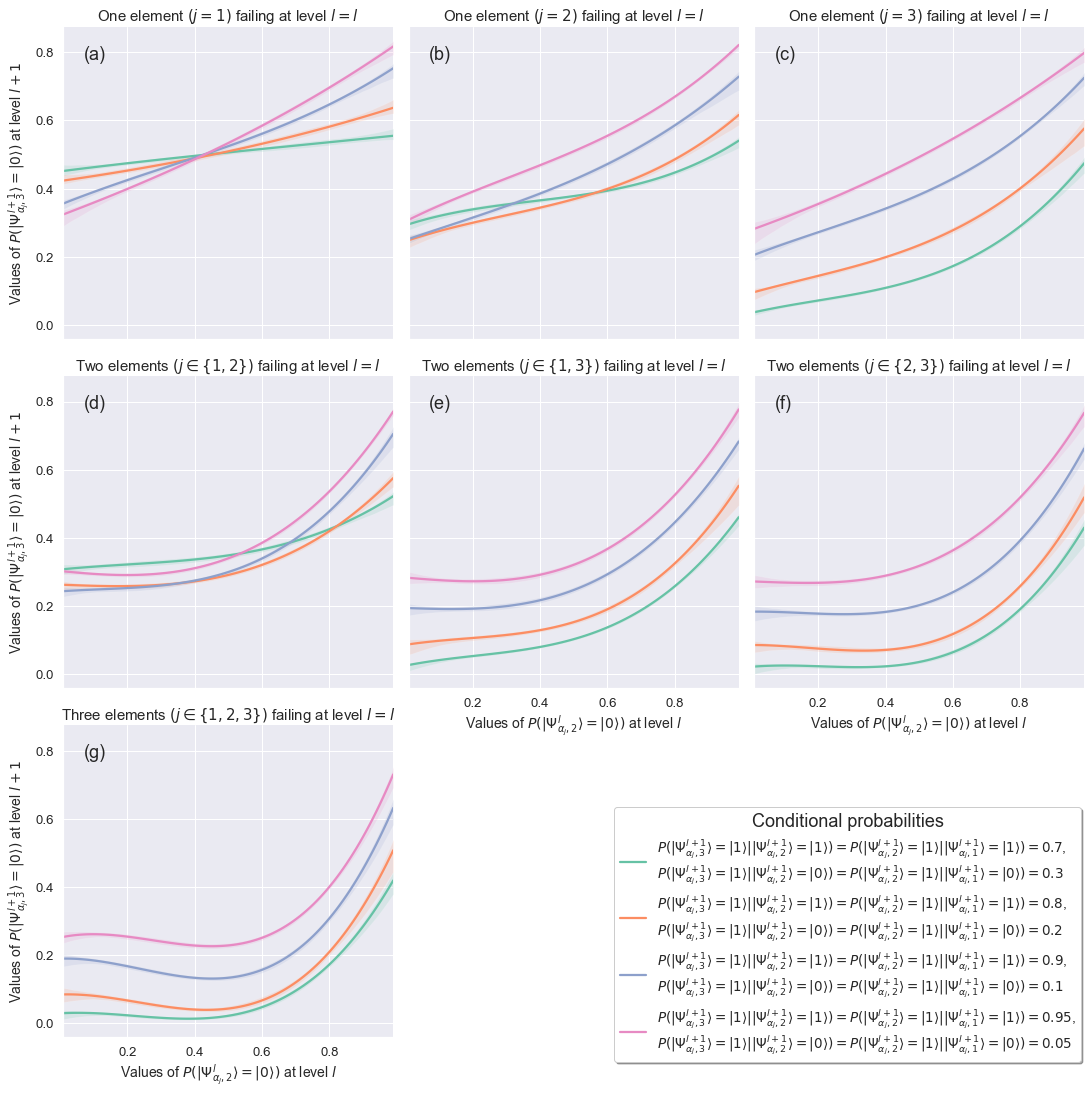

In [3]:
tes = [0.05]
t1s= list(np.arange(0.01,1,0.02))
tbs= [0.7, 0.8, 0.9, 0.95]

for t in tes:
    fig = plt.figure()

    # Element A (j=1) failing at level 'l'
    results_P_B_tb = pd.DataFrame()
    for tb in tbs:
        results_P_B = pd.DataFrame()
        idx = 1
        for t1 in t1s:
                      
            matrix_first_level_circuit_t_s = np.zeros((9))
            for a in [t]:     # a  z_a_1,      = P(A=|1>)   
                for b in [tb]:    # b  z_ba11, = P(B=|1> | A=|1>) 
                    for c in [(1-tb)]:    # c  z_ba10, = P(B=|1> | A=|0>)
                        for d in [tb]:   # d  z_cb11, = P(C=|1> | B=|1>)                      
                            for e in [(1-tb)]:   # e  z_cb10 = P(C=|1> | B=|0>)             
                                for f in [t1]:   #q0_level0_first_circuit_is_0     (A => P(q0_l=|0>) (level 'l' value))                   
                                    for g in [0]:    #q0_level0_second_circuit_is_0   (B => P(q0_l=|0>) (level 'l' value))              
                                        for h in [0]:    #q0_level0_third_circuit_is_0   (C => P(q0_l=|0>) (level 'l' value))              
                                            q=quantum_circuit_three_qubits_configuration(a,b,c,d,e,f,g,h)
                                            matrix_first_level_circuit_t_s=np.vstack([matrix_first_level_circuit_t_s,[q,a,b,c,d,e,f,g,h]])
                                       
            matrix_second_level_circuit_machine_in_position_A=matrix_first_level_circuit_t_s
            
            results_P_B.insert(loc=len(results_P_B.columns),column= str(idx), value=matrix_second_level_circuit_machine_in_position_A[:,0])
            idx += 1

        # plot results    
        results_P_B = results_P_B[(results_P_B > 0.004)]
        results_P_B = results_P_B.loc[1,:]
        results_aux = results_P_B.to_frame()
        results_aux.insert(loc=len(results_aux.columns),column= 't1s', value=t1s)
        results_aux.insert(loc=len(results_aux.columns),column= 'tb', value=tb)
        results_aux.insert(loc=len(results_aux.columns),column= 'qfail', value='j1')

        results_P_B_tb=results_P_B_tb.append(results_aux)        
         
    
    # Element B (j=2) failing at level 'l'
    for tb in tbs:
        results_P_B = pd.DataFrame()
        idx=1
        for t1 in t1s:
                      
            matrix_first_level_circuit_t_s = np.zeros((9))
            for a in [t]:     # a  z_a_1,      = P(A=|1>)   
                for b in [tb]:    # b  z_ba11, = P(B=|1> | A=|1>) 
                    for c in [(1-tb)]:    # c  z_ba10, = P(B=|1> | A=|0>)
                        for d in [tb]:   # d  z_cb11, = P(C=|1> | B=|1>)                      
                            for e in [(1-tb)]:   # e  z_cb10 = P(C=|1> | B=|0>)             
                                for f in [0]:   #q0_level0_first_circuit_is_0     (A => P(q0_l=|0>) (level 'l' value))                   
                                    for g in [t1]:    #q0_level0_second_circuit_is_0   (B => P(q0_l=|0>) (level 'l' value))              
                                        for h in [0]:    #q0_level0_third_circuit_is_0   (C => P(q0_l=|0>) (level 'l' value))              
                                            q=quantum_circuit_three_qubits_configuration(a,b,c,d,e,f,g,h)
                                            matrix_first_level_circuit_t_s=np.vstack([matrix_first_level_circuit_t_s,[q,a,b,c,d,e,f,g,h]])
                                       
            matrix_second_level_circuit_machine_in_position_A=matrix_first_level_circuit_t_s
            
            results_P_B.insert(loc=len(results_P_B.columns),column= str(idx), value=matrix_second_level_circuit_machine_in_position_A[:,0])
            idx += 1

        # plot results           
        results_P_B = results_P_B[(results_P_B > 0.004)]
        results_P_B = results_P_B.loc[1,:]
        results_aux = results_P_B.to_frame()
        results_aux.insert(loc=len(results_aux.columns),column= 't1s', value=t1s)
        results_aux.insert(loc=len(results_aux.columns),column= 'tb', value=tb)
        results_aux.insert(loc=len(results_aux.columns),column= 'qfail', value='j2')

        results_P_B_tb=results_P_B_tb.append(results_aux)        

    # Element C (j=3) failing at level 'l'
    for tb in tbs:
        results_P_B = pd.DataFrame()
        idx=1
        for t1 in t1s:
                      
            matrix_first_level_circuit_t_s = np.zeros((9))
            for a in [t]:     # a  z_a_1,      = P(A=|1>)   
                for b in [tb]:    # b  z_ba11, = P(B=|1> | A=|1>) 
                    for c in [(1-tb)]:    # c  z_ba10, = P(B=|1> | A=|0>)
                        for d in [tb]:   # d  z_cb11, = P(C=|1> | B=|1>)                      
                            for e in [(1-tb)]:   # e  z_cb10 = P(C=|1> | B=|0>)             
                                for f in [0]:   #q0_level0_first_circuit_is_0     (A => P(q0_l=|0>) (level 'l' value))                   
                                    for g in [0]:    #q0_level0_second_circuit_is_0   (B => P(q0_l=|0>) (level 'l' value))              
                                        for h in [t1]:    #q0_level0_third_circuit_is_0   (C => P(q0_l=|0>) (level 'l' value))              
                                            q=quantum_circuit_three_qubits_configuration(a,b,c,d,e,f,g,h)
                                            matrix_first_level_circuit_t_s=np.vstack([matrix_first_level_circuit_t_s,[q,a,b,c,d,e,f,g,h]])
                                       
            matrix_second_level_circuit_machine_in_position_A=matrix_first_level_circuit_t_s
            
            results_P_B.insert(loc=len(results_P_B.columns),column= str(idx), value=matrix_second_level_circuit_machine_in_position_A[:,0])
            idx += 1

        # plot results    
        results_P_B = results_P_B[(results_P_B > 0.004)]
        results_P_B = results_P_B.loc[1,:]
        results_aux = results_P_B.to_frame()
        results_aux.insert(loc=len(results_aux.columns),column= 't1s', value=t1s)
        results_aux.insert(loc=len(results_aux.columns),column= 'tb', value=tb)
        results_aux.insert(loc=len(results_aux.columns),column= 'qfail', value='j3')

        results_P_B_tb=results_P_B_tb.append(results_aux)        


    # Elements A & B (j={1,2}) failing at level 'l'
    for tb in tbs:
        results_P_B = pd.DataFrame()
        idx=1
        for t1 in t1s:
                      
            matrix_first_level_circuit_t_s = np.zeros((9))
            for a in [t]:     # a  z_a_1,      = P(A=|1>)   
                for b in [tb]:    # b  z_ba11, = P(B=|1> | A=|1>) 
                    for c in [(1-tb)]:    # c  z_ba10, = P(B=|1> | A=|0>)
                        for d in [tb]:   # d  z_cb11, = P(C=|1> | B=|1>)                      
                            for e in [(1-tb)]:   # e  z_cb10 = P(C=|1> | B=|0>)             
                                for f in [t1]:   #q0_level0_first_circuit_is_0     (A => P(q0_l=|0>) (level 'l' value))                   
                                    for g in [t1]:    #q0_level0_second_circuit_is_0   (B => P(q0_l=|0>) (level 'l' value))              
                                        for h in [0]:    #q0_level0_third_circuit_is_0   (C => P(q0_l=|0>) (level 'l' value))              
                                            q=quantum_circuit_three_qubits_configuration(a,b,c,d,e,f,g,h)
                                            matrix_first_level_circuit_t_s=np.vstack([matrix_first_level_circuit_t_s,[q,a,b,c,d,e,f,g,h]])
                                       
            matrix_second_level_circuit_machine_in_position_A=matrix_first_level_circuit_t_s
            
            results_P_B.insert(loc=len(results_P_B.columns),column= str(idx), value=matrix_second_level_circuit_machine_in_position_A[:,0])
            idx += 1

        # plot results            
        results_P_B = results_P_B[(results_P_B > 0.004)]
        results_P_B = results_P_B.loc[1,:]
        results_aux = results_P_B.to_frame()
        results_aux.insert(loc=len(results_aux.columns),column= 't1s', value=t1s)
        results_aux.insert(loc=len(results_aux.columns),column= 'tb', value=tb)
        results_aux.insert(loc=len(results_aux.columns),column= 'qfail', value='j1,2')

        results_P_B_tb=results_P_B_tb.append(results_aux)        

    # Elements A & C (j={1,3}) failing at level 'l'
    for tb in tbs:
        results_P_B = pd.DataFrame()
        idx=1
        for t1 in t1s:
                      
            matrix_first_level_circuit_t_s = np.zeros((9))
            for a in [t]:     # a  z_a_1,      = P(A=|1>)   
                for b in [tb]:    # b  z_ba11, = P(B=|1> | A=|1>) 
                    for c in [(1-tb)]:    # c  z_ba10, = P(B=|1> | A=|0>)
                        for d in [tb]:   # d  z_cb11, = P(C=|1> | B=|1>)                      
                            for e in [(1-tb)]:   # e  z_cb10 = P(C=|1> | B=|0>)             
                                for f in [t1]:   #q0_level0_first_circuit_is_0     (A => P(q0_l=|0>) (level 'l' value))                   
                                    for g in [0]:    #q0_level0_second_circuit_is_0   (B => P(q0_l=|0>) (level 'l' value))              
                                        for h in [t1]:    #q0_level0_third_circuit_is_0   (C => P(q0_l=|0>) (level 'l' value))              
                                            q=quantum_circuit_three_qubits_configuration(a,b,c,d,e,f,g,h)
                                            matrix_first_level_circuit_t_s=np.vstack([matrix_first_level_circuit_t_s,[q,a,b,c,d,e,f,g,h]])
                                       
            matrix_second_level_circuit_machine_in_position_A=matrix_first_level_circuit_t_s
            
            results_P_B.insert(loc=len(results_P_B.columns),column= str(idx), value=matrix_second_level_circuit_machine_in_position_A[:,0])
            idx += 1

        # plot results    
        results_P_B = results_P_B[(results_P_B > 0.004)]
        results_P_B = results_P_B.loc[1,:]
        results_aux = results_P_B.to_frame()
        results_aux.insert(loc=len(results_aux.columns),column= 't1s', value=t1s)
        results_aux.insert(loc=len(results_aux.columns),column= 'tb', value=tb)
        results_aux.insert(loc=len(results_aux.columns),column= 'qfail', value='j1,3')

        results_P_B_tb=results_P_B_tb.append(results_aux)        
 
    
    # Elements B & C (j={2,3}) failing at level 'l'
    for tb in tbs:
        results_P_B = pd.DataFrame()
        idx=1
        for t1 in t1s:
                      
            matrix_first_level_circuit_t_s = np.zeros((9))
            for a in [t]:     # a  z_a_1,      = P(A=|1>)   
                for b in [tb]:    # b  z_ba11, = P(B=|1> | A=|1>) 
                    for c in [(1-tb)]:    # c  z_ba10, = P(B=|1> | A=|0>)
                        for d in [tb]:   # d  z_cb11, = P(C=|1> | B=|1>)                      
                            for e in [(1-tb)]:   # e  z_cb10 = P(C=|1> | B=|0>)             
                                for f in [0]:   #q0_level0_first_circuit_is_0     (A => P(q0_l=|0>) (level 'l' value))                   
                                    for g in [t1]:    #q0_level0_second_circuit_is_0   (B => P(q0_l=|0>) (level 'l' value))              
                                        for h in [t1]:    #q0_level0_third_circuit_is_0   (C => P(q0_l=|0>) (level 'l' value))              
                                            q=quantum_circuit_three_qubits_configuration(a,b,c,d,e,f,g,h)
                                            matrix_first_level_circuit_t_s=np.vstack([matrix_first_level_circuit_t_s,[q,a,b,c,d,e,f,g,h]])
                                       
            matrix_second_level_circuit_machine_in_position_A=matrix_first_level_circuit_t_s
            
            results_P_B.insert(loc=len(results_P_B.columns),column= str(idx), value=matrix_second_level_circuit_machine_in_position_A[:,0])
            idx += 1

        # plot results    
        results_P_B = results_P_B[(results_P_B > 0.004)]
        results_P_B = results_P_B.loc[1,:]
        results_aux = results_P_B.to_frame()
        results_aux.insert(loc=len(results_aux.columns),column= 't1s', value=t1s)
        results_aux.insert(loc=len(results_aux.columns),column= 'tb', value=tb)
        results_aux.insert(loc=len(results_aux.columns),column= 'qfail', value='j2,3')

        results_P_B_tb=results_P_B_tb.append(results_aux)        

    # Elements A, B & C (j={1,2,3}) failing at level 'l'
    for tb in tbs:
        results_P_B = pd.DataFrame()
        idx=1
        for t1 in t1s:
                      
            matrix_first_level_circuit_t_s = np.zeros((9))
            for a in [t]:     # a  z_a_1,      = P(A=|1>)   
                for b in [tb]:    # b  z_ba11, = P(B=|1> | A=|1>) 
                    for c in [(1-tb)]:    # c  z_ba10, = P(B=|1> | A=|0>)
                        for d in [tb]:   # d  z_cb11, = P(C=|1> | B=|1>)                      
                            for e in [(1-tb)]:   # e  z_cb10 = P(C=|1> | B=|0>)             
                                for f in [t1]:   #q0_level0_first_circuit_is_0     (A => P(q0_l=|0>) (level 'l' value))                   
                                    for g in [t1]:    #q0_level0_second_circuit_is_0   (B => P(q0_l=|0>) (level 'l' value))              
                                        for h in [t1]:    #q0_level0_third_circuit_is_0   (C => P(q0_l=|0>) (level 'l' value))              
                                            q=quantum_circuit_three_qubits_configuration(a,b,c,d,e,f,g,h)
                                            matrix_first_level_circuit_t_s=np.vstack([matrix_first_level_circuit_t_s,[q,a,b,c,d,e,f,g,h]])
                                       
            matrix_second_level_circuit_machine_in_position_A=matrix_first_level_circuit_t_s
            
            results_P_B.insert(loc=len(results_P_B.columns),column= str(idx), value=matrix_second_level_circuit_machine_in_position_A[:,0])
            idx += 1

        # plot results          
        results_P_B = results_P_B[(results_P_B > 0.004)]
        results_P_B = results_P_B.loc[1,:]
        results_aux = results_P_B.to_frame()
        results_aux.insert(loc=len(results_aux.columns),column= 't1s', value=t1s)
        results_aux.insert(loc=len(results_aux.columns),column= 'tb', value=tb)
        results_aux.insert(loc=len(results_aux.columns),column= 'qfail', value='j1,2,3')

        results_P_B_tb=results_P_B_tb.append(results_aux)        
            
    results_P_B_tb.rename(columns = {1: 'q0'}, inplace=True)
        
    sns.set(font_scale=1.2)
    ax = sns.lmplot(x='t1s', y='q0', hue='tb', col='qfail', data=results_P_B_tb, ci=95, col_wrap=3, legend_out=False, palette=sns.color_palette('Set2'),order=3, scatter=False) 
    ax.fig.axes[0].set_title('One element '+r'$(j=1)$'+' failing at level '+r'$l=l$',fontsize=15)
    ax.fig.axes[1].set_title('One element '+r'$(j=2)$'+' failing at level '+r'$l=l$',fontsize=15)
    ax.fig.axes[2].set_title('One element '+r'$(j=3)$'+' failing at level '+r'$l=l$',fontsize=15)
    ax.fig.axes[3].set_title('Two elements '+r'$(j\in\{1,2\})$'+' failing at level '+r'$l=l$',fontsize=15)
    ax.fig.axes[4].set_title('Two elements '+r'$(j\in\{1,3\})$'+' failing at level '+r'$l=l$',fontsize=15)
    ax.fig.axes[5].set_title('Two elements '+r'$(j\in\{2,3\})$'+' failing at level '+r'$l=l$',fontsize=15)
    ax.fig.axes[6].set_title('Three elements '+r'$(j\in\{1,2,3\})$'+' failing at level '+r'$l=l$',fontsize=15)
    ax.set_axis_labels(r'Values of $P(\vert{\Psi_{\alpha_{j},2}^{l}}\rangle=\vert{0}\rangle)$ at level $l$', r'Values of $P(\vert{\Psi_{\alpha_{j},3}^{l+1}}\rangle=\vert{0}\rangle)$ at level $l+1$',fontsize=14)
    ax.add_legend(bbox_to_anchor=(1.67, -1.5), loc=2, borderaxespad=0., title='Conditional probabilities',facecolor ='white', shadow=True)
    
    new_labels=[r'$P(\vert{\Psi_{\alpha_{j},3}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{1}\rangle)=P(\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},1}^{l+1}}\rangle=\vert{1}\rangle)=0.7$'+',\n'+r'$P(\vert{\Psi_{\alpha_{j},3}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{0}\rangle)=P(\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},1}^{l+1}}\rangle=\vert{0}\rangle)=0.3$',
                r'$P(\vert{\Psi_{\alpha_{j},3}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{1}\rangle)=P(\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},1}^{l+1}}\rangle=\vert{1}\rangle)=0.8$'+',\n'+r'$P(\vert{\Psi_{\alpha_{j},3}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{0}\rangle)=P(\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},1}^{l+1}}\rangle=\vert{0}\rangle)=0.2$',
                r'$P(\vert{\Psi_{\alpha_{j},3}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{1}\rangle)=P(\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},1}^{l+1}}\rangle=\vert{1}\rangle)=0.9$'+',\n'+r'$P(\vert{\Psi_{\alpha_{j},3}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{0}\rangle)=P(\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},1}^{l+1}}\rangle=\vert{0}\rangle)=0.1$',
                r'$P(\vert{\Psi_{\alpha_{j},3}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{1}\rangle)=P(\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},1}^{l+1}}\rangle=\vert{1}\rangle)=0.95$'+',\n'+r'$P(\vert{\Psi_{\alpha_{j},3}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{0}\rangle)=P(\vert{\Psi_{\alpha_{j},2}^{l+1}}\rangle=\vert{1}\rangle\vert\vert{\Psi_{\alpha_{j},1}^{l+1}}\rangle=\vert{0}\rangle)=0.05$']

    # replace labels
    for s, l in zip(ax._legend.texts, new_labels): s.set_text(l)
    
    plt.setp(ax._legend.get_texts(), fontsize='13.5') # for legend text
    plt.setp(ax._legend.get_title(), fontsize='18') # for legend title

    plot_labels = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)']
    for s, title in zip(ax.axes.flat, plot_labels):
        # s.set_title(title)
        s.text(0.07, 0.78, title, fontsize=18) #add text

    fig.set_size_inches(w=35,h=35, forward=True)  
    ax.savefig('QCPS_Circuit_111_paper_order_3_t_'+str(t)+'.pdf',bbox_inches='tight')    # when publishing, use high quality PDFs
    plt.show()
